<a href="https://colab.research.google.com/github/Eswar-8/Predicting_Heart-Disease/blob/main/Heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Heart_Disease.csv to Heart_Disease.csv


In [3]:
data=pd.read_csv('Heart_Disease.csv')
df=data.dropna()
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


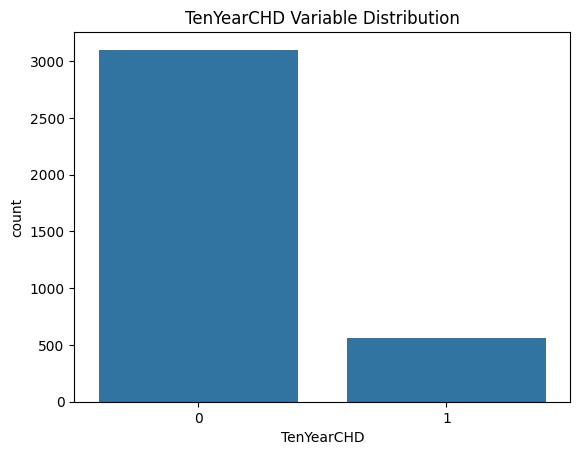

In [4]:
sns.countplot(x='TenYearCHD',data=df)
plt.title('TenYearCHD Variable Distribution')
plt.show()

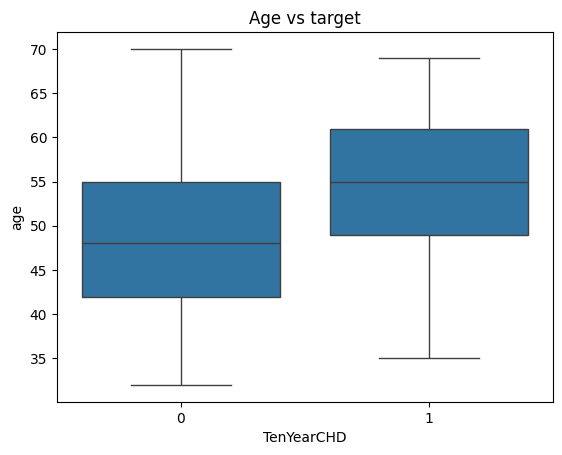

In [5]:
sns.boxplot(x='TenYearCHD',y='age',data=df)
plt.title('Age vs target')
plt.show()

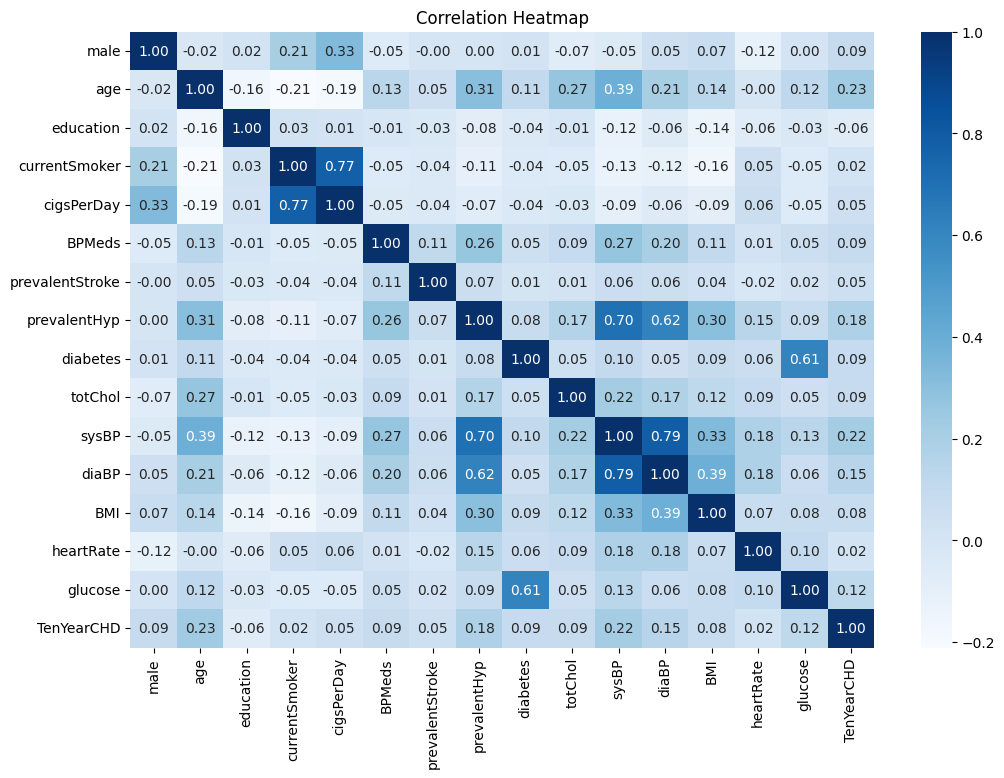

In [6]:
plt.figure(figsize=(12,8))
sns.heatmap(data=df.corr(),cmap='Blues',annot=True,fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [7]:
X=df.drop(columns=['TenYearCHD','education'])
Y=df['TenYearCHD']
print(Y.value_counts())

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

TenYearCHD
0    3101
1     557
Name: count, dtype: int64


In [8]:
sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.transform(x_test)

Logistic Regression accuracy score 0.8415300546448088


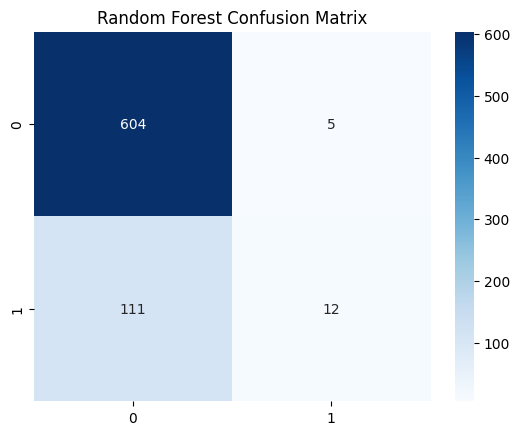

In [9]:
lr=LogisticRegression()
lr.fit(x_train_sc,y_train)
y_log_pred=lr.predict(x_test_sc)
accuracy=accuracy_score(y_test,y_log_pred)
print('Logistic Regression accuracy score',accuracy)
cm_log_reg = confusion_matrix(y_test, y_log_pred)
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()

Random Forest accuracy score 0.8333333333333334


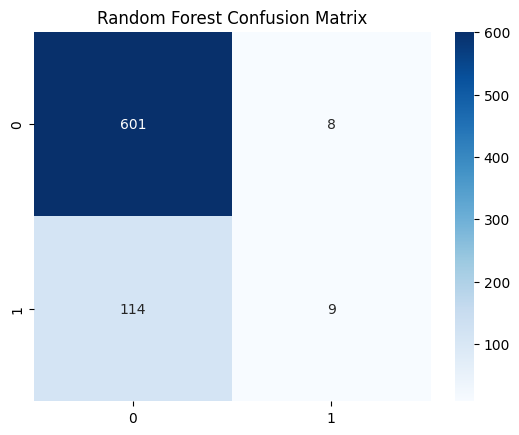

In [10]:
RF=RandomForestClassifier()
RF.fit(x_train_sc,y_train)
y_RF_pred=RF.predict(x_test_sc)
acc_RF = accuracy_score(y_test, y_RF_pred)
print('Random Forest accuracy score',acc_RF)
cm_RF_reg = confusion_matrix(y_test, y_RF_pred)
sns.heatmap(cm_RF_reg, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()


SVM accuracy score 0.8415300546448088


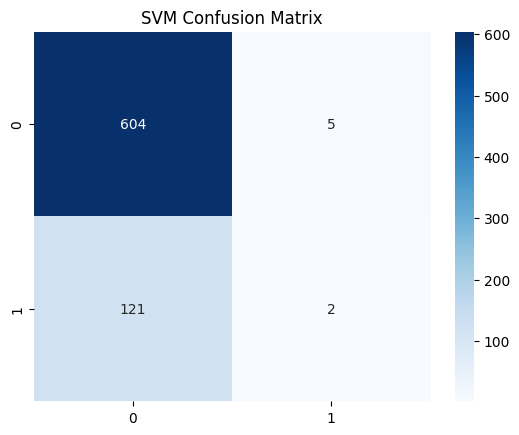

In [11]:
svm=SVC()
svm.fit(x_train_sc,y_train)
y_svm_pred=svm.predict(x_test_sc)
accuracy_svm=accuracy_score(y_test,y_svm_pred)
print('SVM accuracy score',accuracy)
cm_svm = confusion_matrix(y_test, y_svm_pred)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.show()

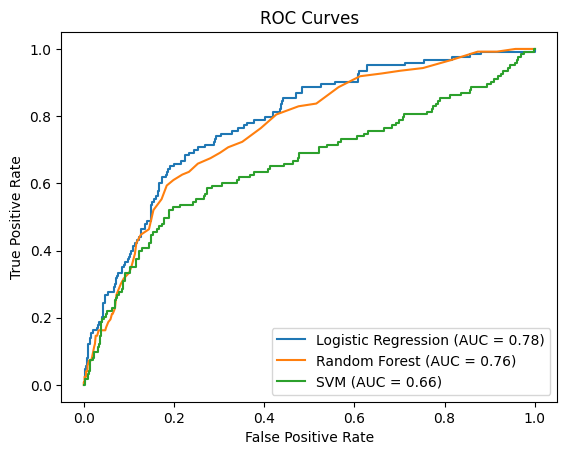

In [12]:
from sklearn.metrics import roc_curve, auc

# Logistic Regression
fpr_lr, tpr_lr,_= roc_curve(y_test, lr.decision_function(x_test_sc))
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Random Forest
fpr_RF, tpr_RF, _ = roc_curve(y_test, RF.predict_proba(x_test_sc)[:, 1])
roc_auc_RF = auc(fpr_RF, tpr_RF)

# SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm.decision_function(x_test_sc))
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC curves
plt.plot(fpr_lr, tpr_lr, label="Logistic Regression (AUC = {:.2f})".format(roc_auc_lr))
plt.plot(fpr_RF, tpr_RF, label="Random Forest (AUC = {:.2f})".format(roc_auc_RF))
plt.plot(fpr_svm, tpr_svm, label="SVM (AUC = {:.2f})".format(roc_auc_svm))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()